<a href="https://colab.research.google.com/github/Sisterno/Blog-frontend/blob/master/IT04/Modelo_entrenamiento__IT04_try01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import pathlib

path_img_leucocitos = "/content/drive/MyDrive/ML/04-dataset-preprocesado-fusion";
pathlib_img_leucocitos=pathlib.Path(path_img_leucocitos)

from google.colab import drive
drive.mount('/content/drive')

# batch_size = 32
batch_size = 64
img_height = 180
img_width = 180

#-------------------------------------------------------------------------------
class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()
    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)
#-------------------------------------------------------------------------------

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 59877 files belonging to 5 classes.
Using 47902 files for training.
Found 59877 files belonging to 5 classes.
Using 11975 files for validation.


## Modelo DS002-I04-D001

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D001 = TimingCallback()
num_classes = 5

model_I04_D001 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D001.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D001.summary()

epochs=20
history_I04_D001 = model_I04_D001.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D001]
)

#-------------------------------------------------------------------------------

Epoch 1/20
375/375 [==============================] - 8606s 22s/step - loss: 21.5496 - accuracy: 0.2649 - val_loss: 1.5636 - val_accuracy: 0.3240
Epoch 2/20
375/375 [==============================] - 108s 283ms/step - loss: 1.5604 - accuracy: 0.3229 - val_loss: 1.5576 - val_accuracy: 0.3240
Epoch 3/20
375/375 [==============================] - 106s 278ms/step - loss: 1.5563 - accuracy: 0.3263 - val_loss: 1.5575 - val_accuracy: 0.3240
Epoch 4/20
375/375 [==============================] - 106s 278ms/step - loss: 1.5556 - accuracy: 0.3268 - val_loss: 1.5575 - val_accuracy: 0.3240
Epoch 5/20
375/375 [==============================] - 106s 279ms/step - loss: 1.5498 - accuracy: 0.3261 - val_loss: 1.5581 - val_accuracy: 0.3240
Epoch 6/20
375/375 [==============================] - 105s 277ms/step - loss: 1.4835 - accuracy: 0.3234 - val_loss: 1.5455 - val_accuracy: 0.3240
Epoch 7/20
375/375 [==============================] - 106s 280ms/step - loss: 1.4464 - accuracy: 0.3352 - val_loss: 1.5331 -

[8605.586656093597, 107.85742497444153, 105.75013279914856, 105.84317135810852, 106.07898259162903, 105.36290574073792, 106.48157501220703, 107.20728063583374, 107.34160089492798, 106.14962124824524, 104.96776461601257, 105.6636278629303, 106.36262369155884, 107.34806871414185, 108.62105369567871, 106.14030337333679, 104.53608870506287, 108.72711372375488, 104.74084377288818, 106.92818713188171]
El entrenamiento se demoro: 10627.695026636124 segundos
El entrenamiento se demoro: 177.1282504439354 minutos
accuracy => 0.8697131872177124
loss => 0.3430776596069336
val_accuracy => 0.8610438704490662
val_loss => 0.38746097683906555


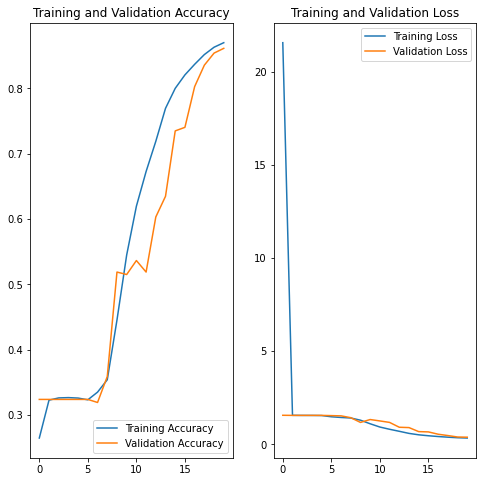

In [ ]:
#-------------------------------------------------------------------------------
print(cb_I04_D001.times)
final_time = 0
for time in cb_I04_D001.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D001.history['accuracy'])))
print('loss => '+ str(min(history_I04_D001.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D001.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D001.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D001.history['accuracy']
val_acc = history_I04_D001.history['val_accuracy']

loss=history_I04_D001.history['loss']
val_loss=history_I04_D001.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D002

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D002 = TimingCallback()
num_classes = 10

model_I04_D002 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D (16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D002.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D002.summary()

epochs=20
history_I04_D002 = model_I04_D002.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D002]
)

#-------------------------------------------------------------------------------

Epoch 1/20
375/375 [==============================] - 110s 286ms/step - loss: 43.4041 - accuracy: 0.3921 - val_loss: 1.3222 - val_accuracy: 0.4357
Epoch 2/20
375/375 [==============================] - 108s 285ms/step - loss: 1.0856 - accuracy: 0.5593 - val_loss: 1.1808 - val_accuracy: 0.5111
Epoch 3/20
375/375 [==============================] - 107s 281ms/step - loss: 0.9531 - accuracy: 0.6078 - val_loss: 1.0694 - val_accuracy: 0.5691
Epoch 4/20
375/375 [==============================] - 107s 282ms/step - loss: 0.8381 - accuracy: 0.6552 - val_loss: 0.7857 - val_accuracy: 0.6927
Epoch 5/20
375/375 [==============================] - 109s 285ms/step - loss: 0.6981 - accuracy: 0.7161 - val_loss: 0.7579 - val_accuracy: 0.7169
Epoch 6/20
375/375 [==============================] - 111s 292ms/step - loss: 0.6103 - accuracy: 0.7566 - val_loss: 0.5993 - val_accuracy: 0.7799
Epoch 7/20
375/375 [==============================] - 109s 287ms/step - loss: 0.5117 - accuracy: 0.7977 - val_loss: 0.5651 

[110.17833232879639, 108.33589267730713, 106.8537654876709, 107.1444411277771, 108.5108687877655, 111.2113881111145, 109.20001244544983, 109.71485781669617, 106.84813380241394, 109.99188423156738, 111.31742215156555, 107.92097067832947, 107.9483094215393, 111.80941200256348, 107.55023288726807, 112.90763926506042, 107.63189840316772, 111.36736965179443, 111.80519795417786, 117.00651574134827]
El entrenamiento se demoro: 2195.2545449733734 segundos
El entrenamiento se demoro: 36.58757574955622 minutos
accuracy => 0.9421318769454956
loss => 0.1547779142856598
val_accuracy => 0.9262630343437195
val_loss => 0.20120182633399963


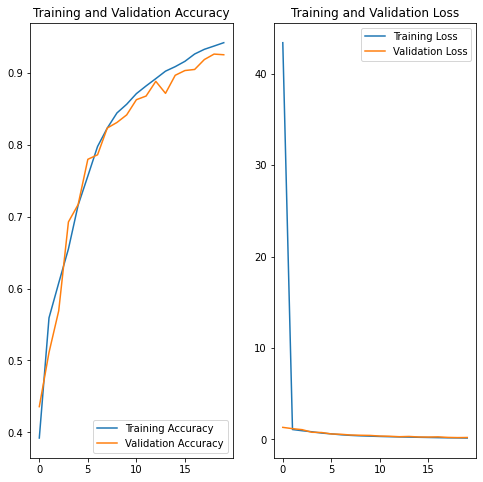

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I04_D002.times)
final_time = 0
for time in cb_I04_D002.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D002.history['accuracy'])))
print('loss => '+ str(min(history_I04_D002.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D002.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D002.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D002.history['accuracy']
val_acc = history_I04_D002.history['val_accuracy']

loss=history_I04_D002.history['loss']
val_loss=history_I04_D002.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D003

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D003 = TimingCallback()
num_classes = 5
epochs=20

model_I04_D003 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D003.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D003.summary()


history_I04_D003 = model_I04_D003.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D003]
)

#-------------------------------------------------------------------------------

Epoch 1/20
749/749 [==============================] - 112s 148ms/step - loss: 24.5290 - accuracy: 0.3360 - val_loss: 1.4727 - val_accuracy: 0.3723
Epoch 2/20
749/749 [==============================] - 112s 149ms/step - loss: 1.2602 - accuracy: 0.4510 - val_loss: 1.2627 - val_accuracy: 0.5039
Epoch 3/20
749/749 [==============================] - 113s 150ms/step - loss: 1.0302 - accuracy: 0.5811 - val_loss: 1.0496 - val_accuracy: 0.5885
Epoch 4/20
749/749 [==============================] - 112s 149ms/step - loss: 0.8041 - accuracy: 0.6682 - val_loss: 0.7685 - val_accuracy: 0.6821
Epoch 5/20
749/749 [==============================] - 111s 148ms/step - loss: 0.7406 - accuracy: 0.6953 - val_loss: 0.7607 - val_accuracy: 0.6932
Epoch 6/20
749/749 [==============================] - 111s 147ms/step - loss: 0.6716 - accuracy: 0.7191 - val_loss: 0.7130 - val_accuracy: 0.7041
Epoch 7/20
749/749 [==============================] - 111s 147ms/step - loss: 0.6062 - accuracy: 0.7613 - val_loss: 0.6689 

[112.37361931800842, 112.47367811203003, 112.96587753295898, 112.12272024154663, 111.46414995193481, 111.00726580619812, 110.81419014930725, 111.39912438392639, 111.4483573436737, 111.07213425636292, 112.21783089637756, 112.00874948501587, 111.43912434577942, 112.29983043670654, 111.75353479385376, 111.8654317855835, 111.26932644844055, 110.72789311408997, 111.3000111579895, 110.60515308380127]
El entrenamiento se demoro: 2232.628002643585 segundos
El entrenamiento se demoro: 37.21046671072642 minutos
accuracy => 0.9202747344970703
loss => 0.23766906559467316
val_accuracy => 0.89620041847229
val_loss => 0.3371424674987793


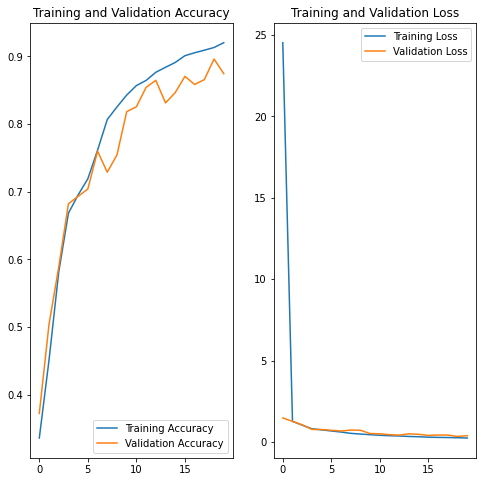

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I04_D003.times)
final_time = 0
for time in cb_I04_D003.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D003.history['accuracy'])))
print('loss => '+ str(min(history_I04_D003.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D003.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D003.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D003.history['accuracy']
val_acc = history_I04_D003.history['val_accuracy']

loss=history_I04_D003.history['loss']
val_loss=history_I04_D003.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D004

In [20]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D004 = TimingCallback()
num_classes = 5

model_I04_D004 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D004.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D004.summary()

epochs=20
history_I04_D004 = model_I04_D004.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D004]
)

#-------------------------------------------------------------------------------

Epoch 1/20
94/94 [==============================] - 113s 1s/step - loss: 25.0747 - accuracy: 0.2374 - val_loss: 1.6023 - val_accuracy: 0.3240
Epoch 2/20
94/94 [==============================] - 108s 1s/step - loss: 1.5953 - accuracy: 0.3270 - val_loss: 1.5891 - val_accuracy: 0.3240
Epoch 3/20
94/94 [==============================] - 107s 1s/step - loss: 1.5830 - accuracy: 0.3270 - val_loss: 1.5784 - val_accuracy: 0.3240
Epoch 4/20
94/94 [==============================] - 106s 1s/step - loss: 1.5733 - accuracy: 0.3270 - val_loss: 1.5704 - val_accuracy: 0.3240


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f97cdd2c9e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Epoch 5/20
94/94 [==============================] - 104s 1s/step - loss: 1.5665 - accuracy: 0.3270 - val_loss: 1.5650 - val_accuracy: 0.3240
Epoch 6/20
94/94 [==============================] - 104s 1s/step - loss: 1.5619 - accuracy: 0.3270 - val_loss: 1.5616 - val_accuracy: 0.3240
Epoch 7/20
94/94 [==============================] - 105s 1s/step - loss: 1.5590 - accuracy: 0.3270 - val_loss: 1.5595 - val_accuracy: 0.3240
Epoch 8/20
94/94 [==============================] - 104s 1s/step - loss: 1.5573 - accuracy: 0.3270 - val_loss: 1.5584 - val_accuracy: 0.3240
Epoch 9/20
94/94 [==============================] - 105s 1s/step - loss: 1.5563 - accuracy: 0.3270 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 10/20
94/94 [==============================] - 104s 1s/step - loss: 1.5558 - accuracy: 0.3270 - val_loss: 1.5576 - val_accuracy: 0.3240
Epoch 11/20
94/94 [==============================] - 104s 1s/step - loss: 1.5556 - accuracy: 0.3270 - val_loss: 1.5575 - val_accuracy: 0.3240
Epoch 12/20

[112.99677276611328, 108.13477849960327, 106.60301160812378, 105.5856704711914, 104.32997822761536, 104.31804990768433, 104.67757534980774, 104.46564412117004, 104.69796395301819, 104.26843547821045, 104.09277558326721, 104.50483465194702, 104.85580277442932, 104.67669701576233, 104.30400466918945, 103.90752792358398, 104.45849275588989, 103.90919923782349, 104.49060249328613, 104.27072930335999]
El entrenamiento se demoro: 2103.5485467910767 segundos
El entrenamiento se demoro: 35.059142446517946 minutos
accuracy => 0.3270009458065033
loss => 1.5553724765777588
val_accuracy => 0.32400834560394287
val_loss => 1.5574722290039062


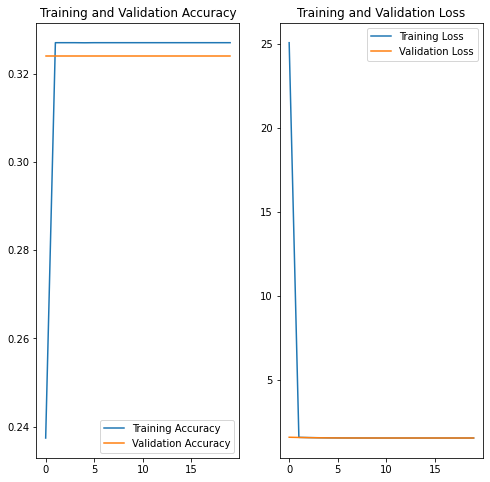

In [21]:
#-------------------------------------------------------------------------------
print(cb_I04_D004.times)
final_time = 0
for time in cb_I04_D004.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D004.history['accuracy'])))
print('loss => '+ str(min(history_I04_D004.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D004.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D004.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D004.history['accuracy']
val_acc = history_I04_D004.history['val_accuracy']

loss=history_I04_D004.history['loss']
val_loss=history_I04_D004.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D005

In [22]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D005 = TimingCallback()
num_classes = 10

model_I04_D005 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D (16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D005.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D005.summary()

epochs=20
history_I04_D005 = model_I04_D005.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D005]
)

#-------------------------------------------------------------------------------

Epoch 1/20
94/94 [==============================] - 114s 1s/step - loss: 285.4664 - accuracy: 0.2449 - val_loss: 2.2212 - val_accuracy: 0.1773
Epoch 2/20
94/94 [==============================] - 107s 1s/step - loss: 1.8012 - accuracy: 0.2712 - val_loss: 2.1101 - val_accuracy: 0.1486
Epoch 3/20
94/94 [==============================] - 107s 1s/step - loss: 1.6958 - accuracy: 0.2802 - val_loss: 1.8955 - val_accuracy: 0.1486
Epoch 4/20
94/94 [==============================] - 107s 1s/step - loss: 1.6271 - accuracy: 0.2883 - val_loss: 1.6659 - val_accuracy: 0.1836
Epoch 5/20
94/94 [==============================] - 107s 1s/step - loss: 1.5805 - accuracy: 0.3010 - val_loss: 1.4411 - val_accuracy: 0.4551
Epoch 6/20
94/94 [==============================] - 107s 1s/step - loss: 1.5201 - accuracy: 0.3291 - val_loss: 1.4451 - val_accuracy: 0.2907
Epoch 7/20
94/94 [==============================] - 107s 1s/step - loss: 1.4778 - accuracy: 0.3556 - val_loss: 1.5630 - val_accuracy: 0.2558
Epoch 8/20


[113.99845027923584, 107.34848690032959, 107.39892840385437, 107.02201700210571, 106.85146570205688, 107.04030990600586, 107.24992084503174, 106.94325828552246, 107.0797700881958, 106.83580780029297, 106.8692672252655, 106.67022347450256, 106.99145078659058, 106.49984979629517, 107.0455915927887, 106.25889563560486, 106.87871861457825, 106.71036863327026, 106.9975814819336, 106.81334519386292]
El entrenamiento se demoro: 2145.5037076473236 segundos
El entrenamiento se demoro: 35.758395127455394 minutos
accuracy => 0.536136269569397
loss => 1.1382274627685547
val_accuracy => 0.47465553879737854
val_loss => 1.2792644500732422


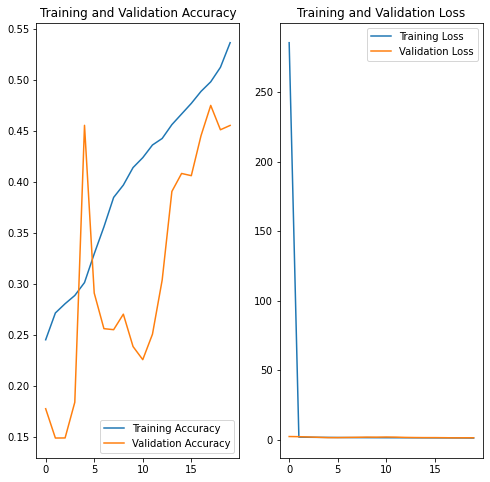

In [23]:
#-------------------------------------------------------------------------------

print(cb_I04_D005.times)
final_time = 0
for time in cb_I04_D005.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D005.history['accuracy'])))
print('loss => '+ str(min(history_I04_D005.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D005.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D005.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D005.history['accuracy']
val_acc = history_I04_D005.history['val_accuracy']

loss=history_I04_D005.history['loss']
val_loss=history_I04_D005.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D006

In [28]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D006 = TimingCallback()
num_classes = 5
epochs=20

model_I04_D006 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D006.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D006.summary()


history_I04_D006 = model_I04_D006.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D006]
)

#-------------------------------------------------------------------------------

Epoch 1/20
749/749 [==============================] - 120s 159ms/step - loss: 18.1978 - accuracy: 0.3258 - val_loss: 1.5592 - val_accuracy: 0.3240
Epoch 2/20
749/749 [==============================] - 120s 159ms/step - loss: 1.5559 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 3/20
749/749 [==============================] - 124s 164ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 4/20
749/749 [==============================] - 121s 160ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5575 - val_accuracy: 0.3240
Epoch 5/20
749/749 [==============================] - 120s 159ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 6/20
749/749 [==============================] - 122s 162ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 7/20
749/749 [==============================] - 121s 160ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I04_D006.times)
final_time = 0
for time in cb_I04_D006.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D006.history['accuracy'])))
print('loss => '+ str(min(history_I04_D006.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D006.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D006.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D006.history['accuracy']
val_acc = history_I04_D006.history['val_accuracy']

loss=history_I04_D006.history['loss']
val_loss=history_I04_D006.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D007

In [29]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D007 = TimingCallback()
num_classes = 5

model_I04_D007 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.75),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.75),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.75),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D007.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D007.summary()

epochs=20
history_I04_D007 = model_I04_D007.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D007]
)

#-------------------------------------------------------------------------------

Epoch 1/20
749/749 [==============================] - 120s 159ms/step - loss: 11.1644 - accuracy: 0.3248 - val_loss: 1.5586 - val_accuracy: 0.3240
Epoch 2/20
749/749 [==============================] - 116s 154ms/step - loss: 1.5557 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 3/20
749/749 [==============================] - 117s 155ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 4/20
749/749 [==============================] - 116s 154ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 5/20
749/749 [==============================] - 118s 156ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 6/20
749/749 [==============================] - 117s 155ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 7/20
749/749 [==============================] - 117s 155ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5575 

[120.34807443618774, 116.4313805103302, 116.57239317893982, 116.36412191390991, 117.51156854629517, 116.64243650436401, 117.19001245498657, 116.30255270004272, 117.61652517318726, 118.61933994293213, 117.55429148674011, 116.58448505401611, 117.98973202705383, 116.67841100692749, 118.82861733436584, 120.50785779953003, 118.66377758979797, 118.48519539833069, 117.91498351097107, 117.26867270469666]
El entrenamiento se demoro: 2354.0744292736053 segundos
El entrenamiento se demoro: 39.23457382122675 minutos
accuracy => 0.3270009458065033
loss => 1.5554518699645996
val_accuracy => 0.32400834560394287
val_loss => 1.5574352741241455


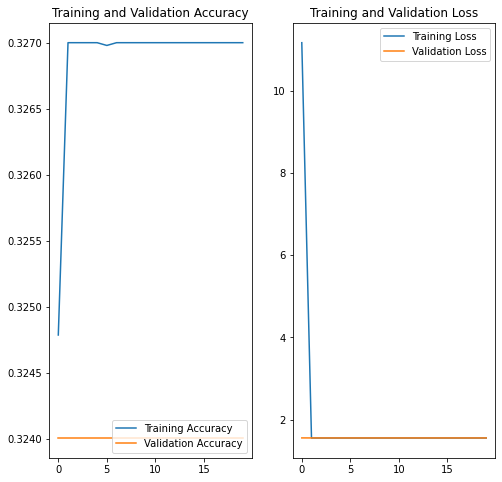

In [30]:
#-------------------------------------------------------------------------------
print(cb_I04_D007.times)
final_time = 0
for time in cb_I04_D007.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D007.history['accuracy'])))
print('loss => '+ str(min(history_I04_D007.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D007.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D007.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D007.history['accuracy']
val_acc = history_I04_D007.history['val_accuracy']

loss=history_I04_D007.history['loss']
val_loss=history_I04_D007.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D008

In [31]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D008 = TimingCallback()
num_classes = 10

model_I04_D008 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D (16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.75),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.75),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.75),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D008.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D008.summary()

epochs=20
history_I04_D008 = model_I04_D008.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D008]
)

#-------------------------------------------------------------------------------

Epoch 1/20
749/749 [==============================] - 122s 159ms/step - loss: 48.7894 - accuracy: 0.2454 - val_loss: 2.0425 - val_accuracy: 0.1775
Epoch 2/20
749/749 [==============================] - 120s 159ms/step - loss: 1.6179 - accuracy: 0.3340 - val_loss: 1.7698 - val_accuracy: 0.3240
Epoch 3/20
749/749 [==============================] - 118s 157ms/step - loss: 1.4819 - accuracy: 0.4010 - val_loss: 1.6975 - val_accuracy: 0.3240
Epoch 4/20
749/749 [==============================] - 118s 156ms/step - loss: 1.4042 - accuracy: 0.4326 - val_loss: 1.6368 - val_accuracy: 0.3240
Epoch 5/20
749/749 [==============================] - 118s 156ms/step - loss: 1.3195 - accuracy: 0.4600 - val_loss: 1.6478 - val_accuracy: 0.3240
Epoch 6/20
749/749 [==============================] - 118s 156ms/step - loss: 1.2676 - accuracy: 0.4812 - val_loss: 1.6373 - val_accuracy: 0.3240
Epoch 7/20
749/749 [==============================] - 118s 157ms/step - loss: 1.2107 - accuracy: 0.4997 - val_loss: 1.6185 

[122.11292147636414, 120.01418375968933, 118.0486671924591, 118.04021406173706, 118.00978970527649, 118.03188228607178, 118.32590055465698, 119.41860675811768, 117.9218156337738, 119.9999692440033, 116.71881532669067, 121.96368384361267, 120.63923358917236, 119.10650539398193, 117.50586652755737, 117.69155621528625, 117.68187355995178, 118.63645195960999, 119.35188102722168, 117.61446499824524]
El entrenamiento se demoro: 2376.8342831134796 segundos
El entrenamiento se demoro: 39.613904718558 minutos
accuracy => 0.7878585457801819
loss => 0.5190821290016174
val_accuracy => 0.6377453207969666
val_loss => 1.0580471754074097


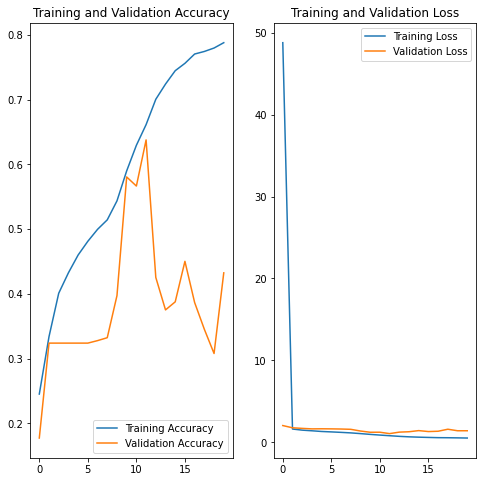

In [32]:
#-------------------------------------------------------------------------------

print(cb_I04_D008.times)
final_time = 0
for time in cb_I04_D008.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D008.history['accuracy'])))
print('loss => '+ str(min(history_I04_D008.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D008.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D008.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D008.history['accuracy']
val_acc = history_I04_D008.history['val_accuracy']

loss=history_I04_D008.history['loss']
val_loss=history_I04_D008.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I04-D009

In [33]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I04_D009 = TimingCallback()
num_classes = 5
epochs=20

model_I04_D009 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.75),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.75),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I04_D009.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I04_D009.summary()


history_I04_D009 = model_I04_D009.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I04_D009]
)

#-------------------------------------------------------------------------------

Epoch 1/20
749/749 [==============================] - 198s 263ms/step - loss: 10.0971 - accuracy: 0.3251 - val_loss: 1.5585 - val_accuracy: 0.3240
Epoch 2/20
749/749 [==============================] - 112s 149ms/step - loss: 1.5557 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 3/20
749/749 [==============================] - 112s 148ms/step - loss: 1.5554 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 4/20
749/749 [==============================] - 112s 148ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5575 - val_accuracy: 0.3240
Epoch 5/20
749/749 [==============================] - 111s 147ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5575 - val_accuracy: 0.3240
Epoch 6/20
749/749 [==============================] - 111s 147ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5575 - val_accuracy: 0.3240
Epoch 7/20
749/749 [==============================] - 111s 147ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 

[197.94710731506348, 112.30314636230469, 111.7823543548584, 111.9351589679718, 111.2734169960022, 110.59384393692017, 111.09534454345703, 111.3307614326477, 111.7567355632782, 111.48144173622131, 111.38842344284058, 111.53686475753784, 111.63090944290161, 111.45012712478638, 111.23800468444824, 112.07016777992249, 111.62552189826965, 111.60434818267822, 111.58701467514038, 111.64891123771667]
El entrenamiento se demoro: 2317.279604434967 segundos
El entrenamiento se demoro: 38.62132674058278 minutos
accuracy => 0.3270009458065033
loss => 1.5554498434066772
val_accuracy => 0.32400834560394287
val_loss => 1.5574357509613037


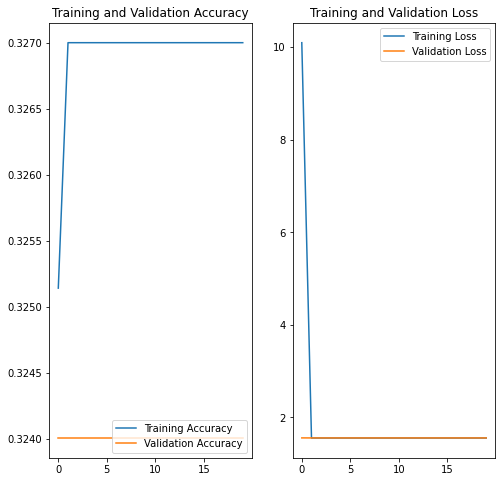

In [34]:
#-------------------------------------------------------------------------------

print(cb_I04_D009.times)
final_time = 0
for time in cb_I04_D009.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I04_D009.history['accuracy'])))
print('loss => '+ str(min(history_I04_D009.history['loss'])))
print('val_accuracy => '+ str(max(history_I04_D009.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I04_D009.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I04_D009.history['accuracy']
val_acc = history_I04_D009.history['val_accuracy']

loss=history_I04_D009.history['loss']
val_loss=history_I04_D009.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()